# Predicting The Winning Football Team

The English Premier League is a popular domestic league in the world 

Design a predictive model capable of predicting if away team will win a football match

# Discription Of Data Set

Date=Match Date (dd/mm/yy)

Referee=Match Referee

Keys to result data:


HomeTeam=Home Team

AwayTeam=Away Team




FTHG and HG= Full Time Home Team Goals





FTAG and AG=Full Time Away Team Goals





FTR and Res=Full Time Result(H=Home Win, D=Draw, A=Away Win)



HTHG=Half Time Home Team Goals



HTAG=Half Time Away Team Goals



HTR=Half Time Result(H=Home Win, D=Draw, A=Away Win)

HS=Home Team Shots

AS=Away Team Shots

HST=Home Team Shots On Target

AST=Away Team Shots On Target

HC=Home Team Corners

AC=Away Team Corners

HF=Home Team Fouls Committed

HY=Home Team Yellow Cards

AY=Away Team Yellow Cards

In [1]:
#importing liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
%matplotlib inline

In [3]:
# Read data from csv into a data frame
df=pd.read_csv("results.csv", encoding='latin1')

In [4]:
df.head(3)

Season              DateTime     HomeTeam   AwayTeam  FTHG  FTAG FTR  \
0  1993-94  1993-08-14T00:00:00Z      Arsenal   Coventry     0     3   A   
1  1993-94  1993-08-14T00:00:00Z  Aston Villa        QPR     4     1   H   
2  1993-94  1993-08-14T00:00:00Z      Chelsea  Blackburn     1     2   A   

   HTHG  HTAG  HTR  ... HST  AST  HC  AC  HF  AF  HY  AY  HR  AR  
0   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2   NaN   NaN  NaN  ... NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[3 rows x 23 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

<AxesSubplot:>

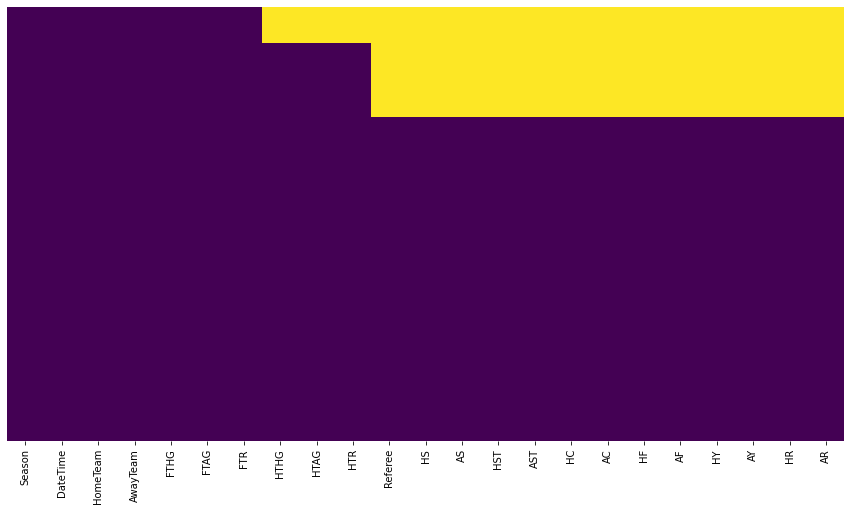

In [6]:
#visualise the proportion of missing data
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Filling of null Values
df['HTHG'].fillna(df['HTHG'].mean(),inplace=True)
df['HTAG'].fillna(df['HTAG'].mean(),inplace=True)
df['HST'].fillna(df['HST'].mean(),inplace=True)
df['AST'].fillna(df['AST'].mean(),inplace=True)
df['HC'].fillna(df['HC'].mean(),inplace=True)
df['AC'].fillna(df['AC'].mean(),inplace=True)
df['HF'].fillna(df['HF'].mean(),inplace=True)
df['AF'].fillna(df['AF'].mean(),inplace=True)
df['HY'].fillna(df['HY'].mean(),inplace=True)
df['AY'].fillna(df['AY'].mean(),inplace=True)
df['HR'].fillna(df['HR'].mean(),inplace=True)
df['AR'].fillna(df['AR'].mean(),inplace=True)
df['HS'].fillna(df['HS'].mean(),inplace=True)
df['AS'].fillna(df['AS'].mean(),inplace=True)
df['HTR'].fillna(df['HTR'].mode()[0],inplace=True)
df['Referee'].fillna(df['Referee'].mode()[0],inplace=True)

<AxesSubplot:>

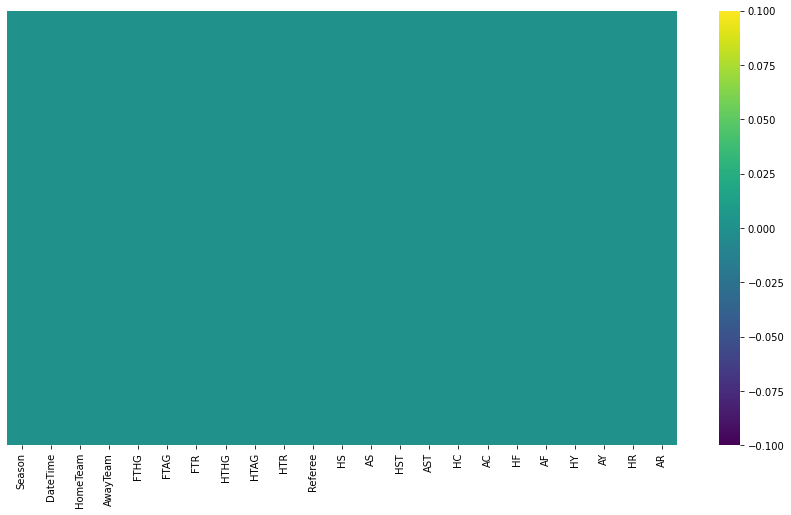

In [8]:
#visualise if there is still a portion of missing values
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [9]:
#only away win
def convert(result):
    if result == 'A':
        return 'A'
    else:
        return 'NA'

In [10]:
df['FTR']=df['FTR'].apply(convert)

In [11]:
htr=pd.get_dummies(df['HTR'],drop_first=True)

In [12]:
df.drop(['HTR'],axis=1,inplace=True)

In [13]:
df.head()

Season              DateTime     HomeTeam        AwayTeam  FTHG  FTAG FTR  \
0  1993-94  1993-08-14T00:00:00Z      Arsenal        Coventry     0     3   A   
1  1993-94  1993-08-14T00:00:00Z  Aston Villa             QPR     4     1  NA   
2  1993-94  1993-08-14T00:00:00Z      Chelsea       Blackburn     1     2   A   
3  1993-94  1993-08-14T00:00:00Z    Liverpool  Sheffield Weds     2     0  NA   
4  1993-94  1993-08-14T00:00:00Z     Man City           Leeds     1     1  NA   

       HTHG      HTAG Referee  ...       HST       AST        HC        AC  \
0  0.684758  0.501031  M Dean  ...  6.117264  4.768247  6.081795  4.784292   
1  0.684758  0.501031  M Dean  ...  6.117264  4.768247  6.081795  4.784292   
2  0.684758  0.501031  M Dean  ...  6.117264  4.768247  6.081795  4.784292   
3  0.684758  0.501031  M Dean  ...  6.117264  4.768247  6.081795  4.784292   
4  0.684758  0.501031  M Dean  ...  6.117264  4.768247  6.081795  4.784292   

          HF         AF        HY        AY        HR        AR  
0  11.379057  11.873447  1.415852  1.746532  0.062854  0.089396  
1  11.379057  11.873447  1.415852  1.746532  0.062854  0.089396  
2  11.379057  11.873447  1.415852  1.746532  0.062854  0.089396  
3  11.379057  11.873447  1.415852  1.746532  0.062854  0.089396  
4  11.379057  11.873447  1.415852  1.746532  0.062854  0.089396  

[5 rows x 22 columns]

In [14]:
df['HomeTeam'].describe()

count       11113
unique         50
top       Arsenal
freq          552
Name: HomeTeam, dtype: object

In [15]:
df['HomeTeam'].value_counts()

Arsenal             552
Man United          552
Liverpool           551
Everton             551
Tottenham           551
Chelsea             550
Newcastle           513
West Ham            495
Aston Villa         494
Man City            456
Southampton         419
Blackburn           327
Sunderland          304
Leicester           302
Fulham              285
Middlesbrough       266
Leeds               248
West Brom           247
Bolton              247
Crystal Palace      227
Stoke               190
Norwich             172
Coventry            156
Wigan               152
Charlton            152
Wolves              149
Burnley             148
Watford             148
Sheffield Weds      137
Wimbledon           137
Birmingham          133
Swansea             133
Derby               133
Portsmouth          133
QPR                 118
Hull                 95
Bournemouth          95
Brighton             92
Ipswich              80
Sheffield United     78
Nott'm Forest        78
Reading         

In [16]:
from sklearn.compose import make_column_selector as selector
categorical_columns_selector=selector(dtype_include=object)
categorical_columns=categorical_columns_selector(df)
categorical_columns

['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTR', 'Referee']

In [17]:
df_categorical=df[categorical_columns]
df_categorical.head()

Season              DateTime     HomeTeam        AwayTeam FTR Referee
0  1993-94  1993-08-14T00:00:00Z      Arsenal        Coventry   A  M Dean
1  1993-94  1993-08-14T00:00:00Z  Aston Villa             QPR  NA  M Dean
2  1993-94  1993-08-14T00:00:00Z      Chelsea       Blackburn   A  M Dean
3  1993-94  1993-08-14T00:00:00Z    Liverpool  Sheffield Weds  NA  M Dean
4  1993-94  1993-08-14T00:00:00Z     Man City           Leeds  NA  M Dean

In [18]:
from sklearn.preprocessing import OrdinalEncoder
df_categorical_columns=df_categorical[["HomeTeam","AwayTeam","Referee","DateTime","Season"]]
encoder=OrdinalEncoder().set_output(transform="pandas")
df_encoded=encoder.fit_transform(df_categorical_columns)
df_encoded

HomeTeam  AwayTeam  Referee  DateTime  Season
0           0.0      15.0     75.0       0.0     0.0
1           1.0      34.0     75.0       0.0     0.0
2          14.0       4.0     75.0       0.0     0.0
3          25.0      37.0     75.0       0.0     0.0
4          26.0      23.0     75.0       0.0     0.0
...         ...       ...      ...       ...     ...
11108       1.0      43.0     50.0    3440.0    28.0
11109       9.0      46.0     73.0    3441.0    28.0
11110      24.0      16.0    115.0    3441.0    28.0
11111      30.0      11.0     79.0    3441.0    28.0
11112      26.0      25.0      4.0    3442.0    28.0

[11113 rows x 5 columns]

In [19]:
df.drop(['HomeTeam','AwayTeam','Referee','DateTime','Season'],axis=1,inplace=True)

In [20]:
df2=pd.concat([df,df_encoded,htr],axis=1)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FTHG      11113 non-null  int64  
 1   FTAG      11113 non-null  int64  
 2   FTR       11113 non-null  object 
 3   HTHG      11113 non-null  float64
 4   HTAG      11113 non-null  float64
 5   HS        11113 non-null  float64
 6   AS        11113 non-null  float64
 7   HST       11113 non-null  float64
 8   AST       11113 non-null  float64
 9   HC        11113 non-null  float64
 10  AC        11113 non-null  float64
 11  HF        11113 non-null  float64
 12  AF        11113 non-null  float64
 13  HY        11113 non-null  float64
 14  AY        11113 non-null  float64
 15  HR        11113 non-null  float64
 16  AR        11113 non-null  float64
 17  HomeTeam  11113 non-null  float64
 18  AwayTeam  11113 non-null  float64
 19  Referee   11113 non-null  float64
 20  DateTime  11113 non-null  fl

<AxesSubplot:>

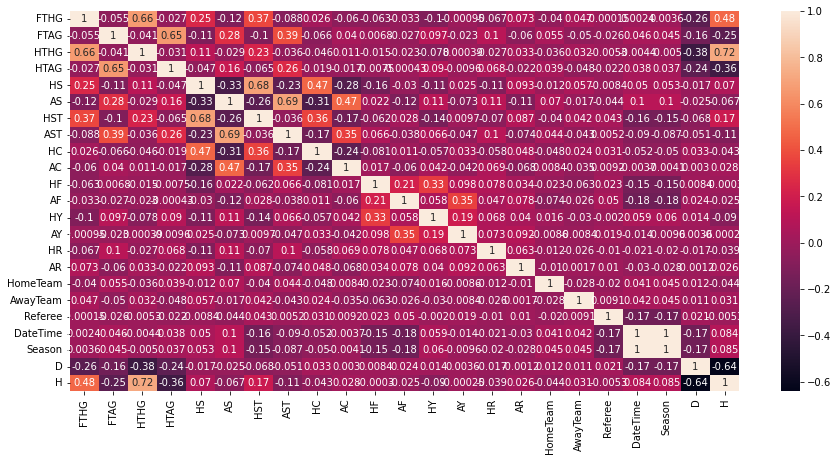

In [22]:
#visualising if some columns are perfectly or highly correlated
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(),annot=True)

In [23]:
df2.drop(['DateTime','Referee'],axis=1,inplace=True)

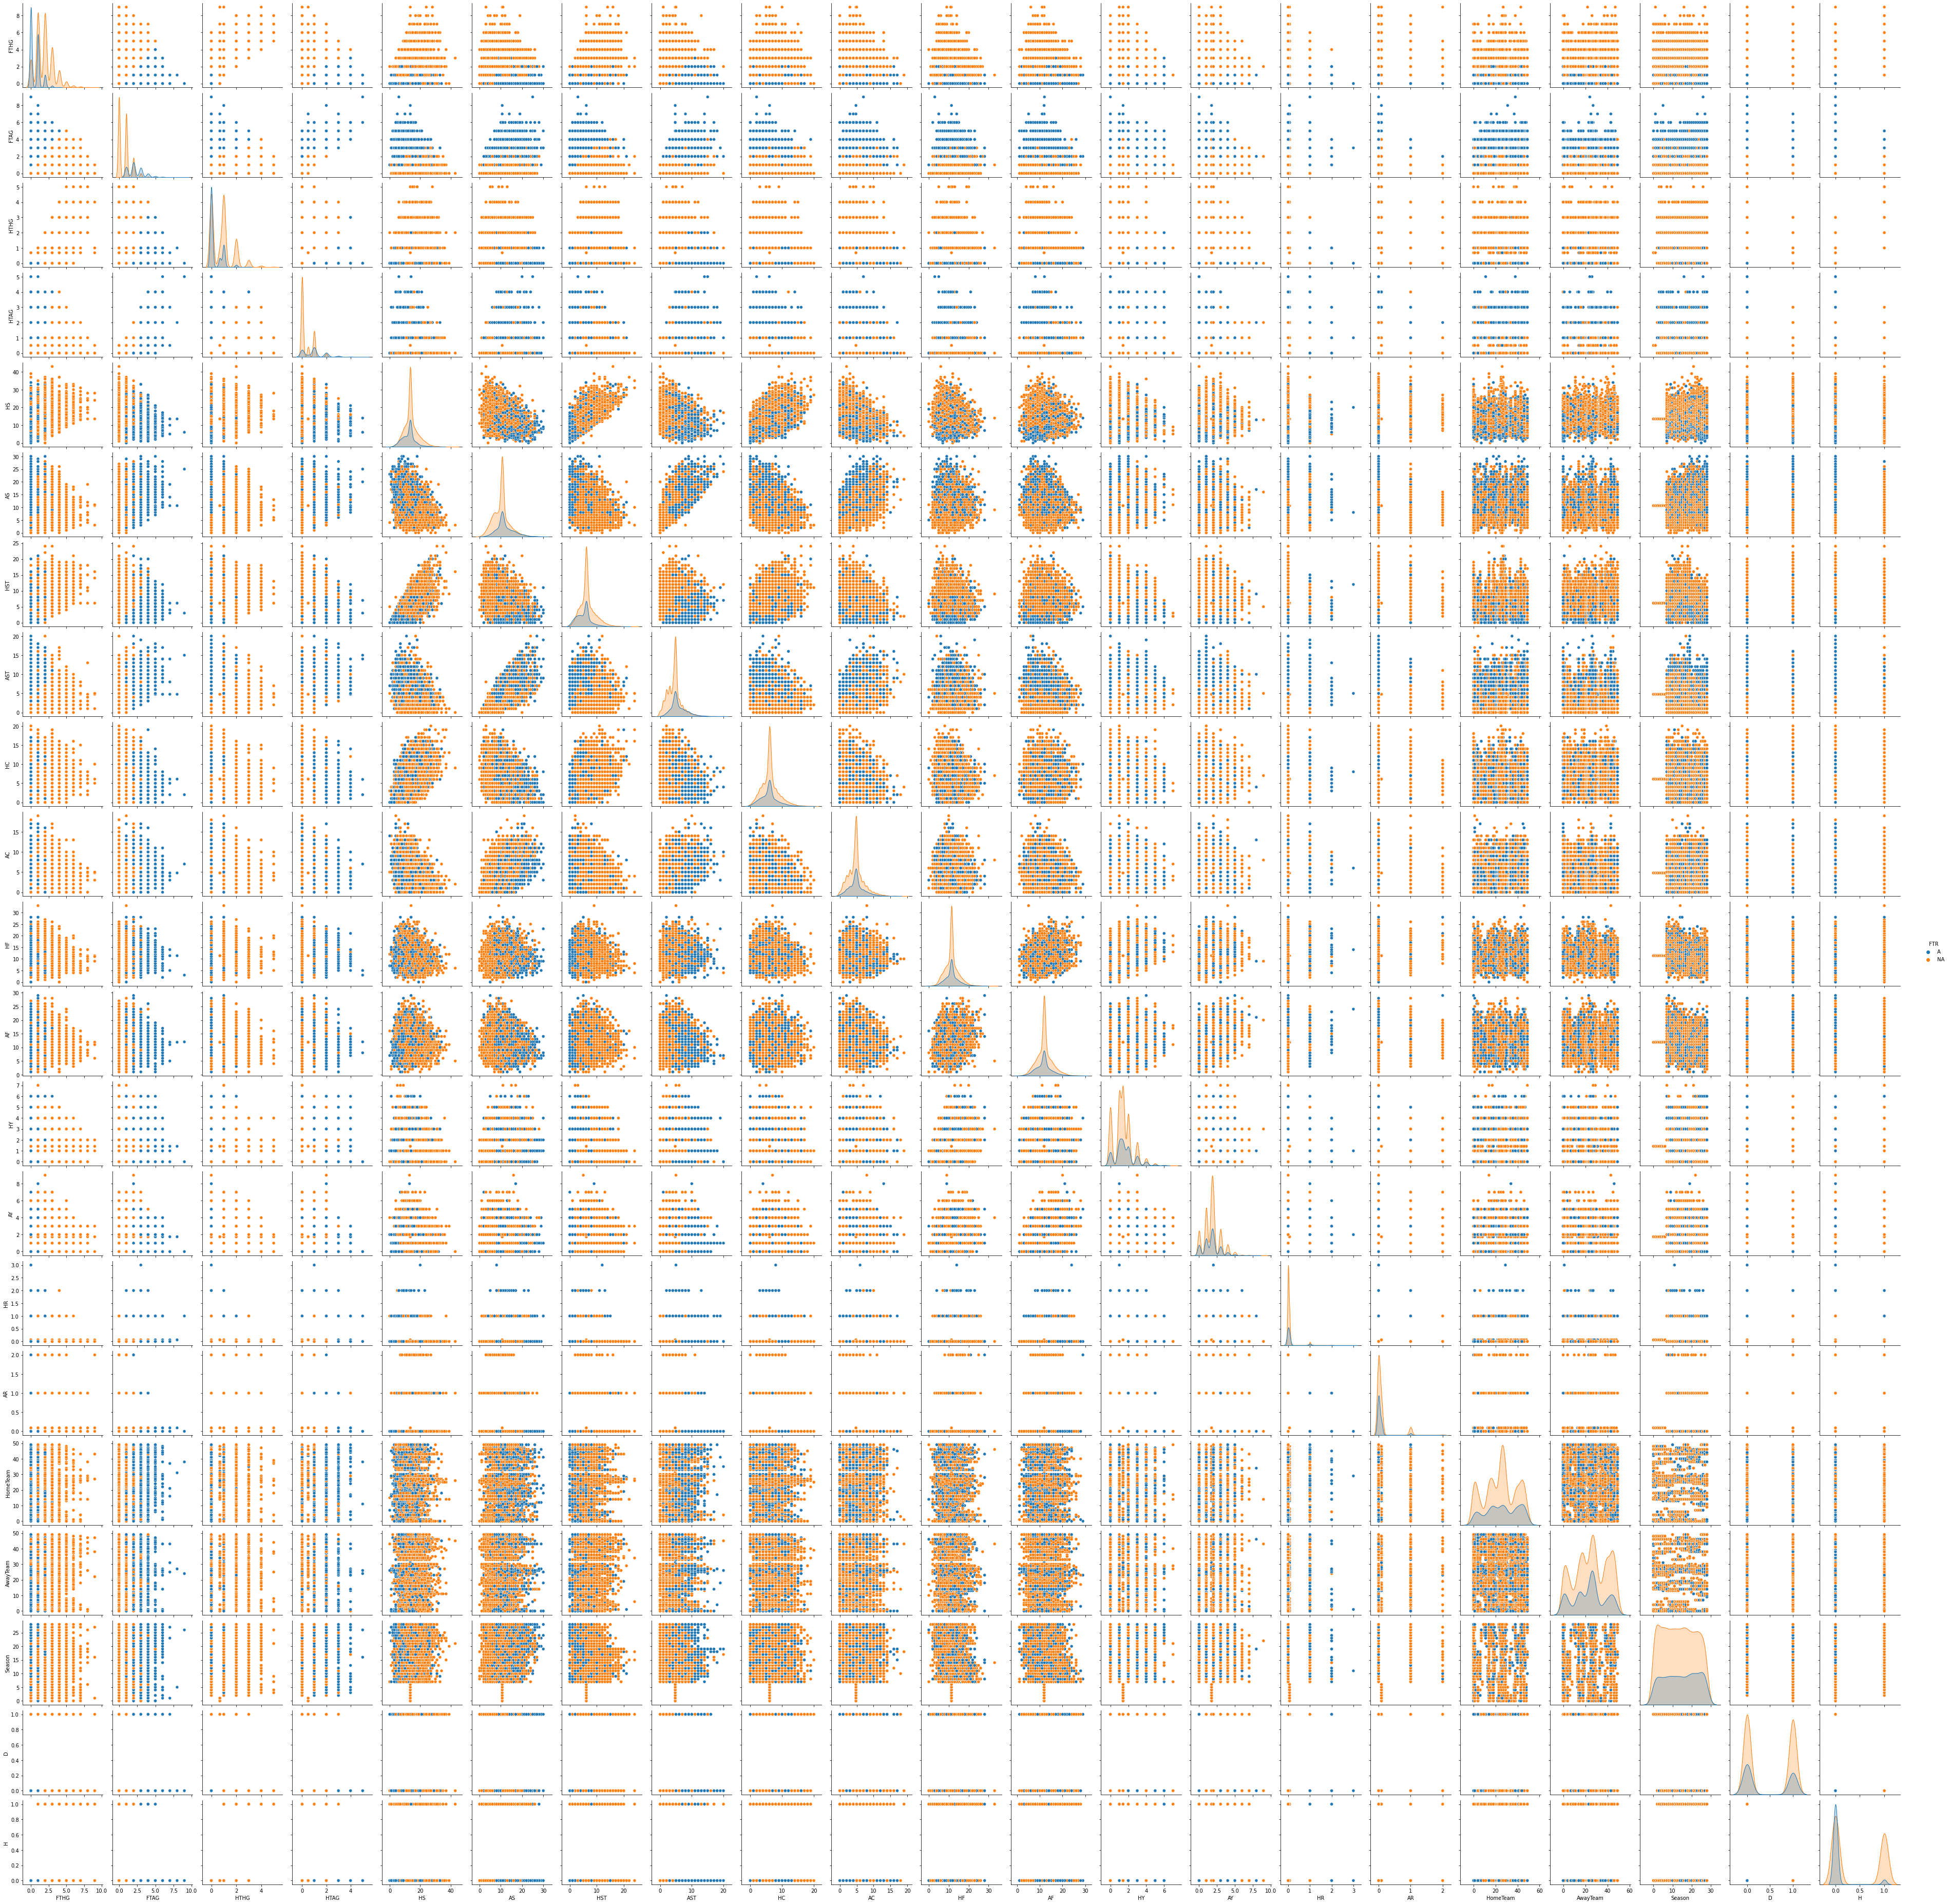

In [34]:
sns.pairplot(df2,hue='FTR')

# Spliting The Data Into Training Set And Testing Set 

In [26]:
y=df2['FTR']
X=df2.drop(['FTR'],axis=1)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# create predictions from the test set 

In [29]:
from sklearn.svm import SVC

In [30]:
svc_model=SVC()

In [31]:
svc_model.fit(X_train,y_train)

SVC()

In [32]:
predictions=svc_model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           A       0.99      0.74      0.85       955
          NA       0.91      1.00      0.95      2379

    accuracy                           0.92      3334
   macro avg       0.95      0.87      0.90      3334
weighted avg       0.93      0.92      0.92      3334



In [36]:
print(confusion_matrix(y_test,predictions))

[[ 707  248]
 [   7 2372]]


In [37]:
predictions

array(['A', 'NA', 'NA', ..., 'NA', 'NA', 'A'], dtype=object)

The model is pretty good with 92% accuracy 